1. 랜덤포레스트
2. knn
3. svm
4. k-means
5. decision-tree
6. logistic regression
7. 선형회귀
8. gradient boosting algorithm


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# 코랩에서 한글 폰트를 사용하기 위한 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_excel('/content/drive/Shareddrives/쥰나쎄/권나경/jjinjjinfinal.xlsx')
data

,Unnamed: 0,시도명,시군구명,개방서비스명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적
0,0,서울특별시,종로구,관광숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,NaN
1,1,서울특별시,종로구,숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,"2,908.49"
2,2,서울특별시,종로구,관광숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,NaN
3,3,서울특별시,종로구,숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,278.43
4,4,서울특별시,종로구,관광숙박업,3000000,20191029,1,NaN,NaN,목시 서울 인사동 호텔,126.986453,37.572297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62421,62664,충청남도,계룡시,숙박업,5580000,20030528,3,20170222.0,NaN,쏘울모텔,127.253214,36.272899,"1,999.00"
62422,62665,충청남도,계룡시,숙박업,5580000,20200515,1,NaN,NaN,화이트모텔,127.251612,36.274451,"1,746.38"
62423,62666,충청남도,계룡시,숙박업,5580000,20030814,3,20200314.0,NaN,화이트모텔,127.251612,36.274451,"2,040.65"
62424,62667,충청남도,계룡시,숙박업,5580000,20030227,3,20210714.0,NaN,호텔리어,127.241293,36.288753,"1,905.13"


In [36]:
mid = data[['시도명','시군구명','개방서비스명', '개방자치단체코드', '인허가일자', '영업상태구분코드', '폐업일자', '휴업시작일자', '사업장명', '경도','위도','소재지면적']]

In [37]:
mid

,시도명,시군구명,개방서비스명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적
0,서울특별시,종로구,관광숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,NaN
1,서울특별시,종로구,숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,"2,908.49"
2,서울특별시,종로구,관광숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,NaN
3,서울특별시,종로구,숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,278.43
4,서울특별시,종로구,관광숙박업,3000000,20191029,1,NaN,NaN,목시 서울 인사동 호텔,126.986453,37.572297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62421,충청남도,계룡시,숙박업,5580000,20030528,3,20170222.0,NaN,쏘울모텔,127.253214,36.272899,"1,999.00"
62422,충청남도,계룡시,숙박업,5580000,20200515,1,NaN,NaN,화이트모텔,127.251612,36.274451,"1,746.38"
62423,충청남도,계룡시,숙박업,5580000,20030814,3,20200314.0,NaN,화이트모텔,127.251612,36.274451,"2,040.65"
62424,충청남도,계룡시,숙박업,5580000,20030227,3,20210714.0,NaN,호텔리어,127.241293,36.288753,"1,905.13"


In [38]:
print(mid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 0 to 62425
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도명       62426 non-null  object 
 1   시군구명      62302 non-null  object 
 2   개방서비스명    62426 non-null  object 
 3   개방자치단체코드  62426 non-null  int64  
 4   인허가일자     62426 non-null  int64  
 5   영업상태구분코드  62426 non-null  int64  
 6   폐업일자      23680 non-null  float64
 7   휴업시작일자    343 non-null    float64
 8   사업장명      62426 non-null  object 
 9   경도        62426 non-null  float64
 10  위도        62426 non-null  float64
 11  소재지면적     49717 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 5.7+ MB
None


## Columns 파악하기

1. 시도명 : 전국의 시도의 이름을 나타낸다.
2. 시군구명 : 전국 시도 아래 시군구의 이름을 나타낸다.
3. 개방서비스명 : 서비스 업종명
4. 개방자치단체코드 :  
 - 인허가 신고를 접수한 기초자치단체(시군구)의 고유코드이다. 
 - 코드설명은 '개방자치단체코드목록(참고).xlsx'에 나타내어있다.
5. 인허가일자 : 업종이인허가를 신고한 일자 이다.
6. 영업상태구분코드 : 
 - 1:영업/정상, 2:휴업, 3:폐업, 4:취소/말소/만료/정지/중지, 5:제외/삭제/전출
 - 숙박업 보유 코드 : 1,3  ,  자동차야영장업 : 1,2,3,4,5
 - 전체총합 데이터에서는 1,2,3만 사용한다.
7. 폐업일자 : 사업자가 폐업을 신고한 일자 이다.
8. 휴업시작일자 : 사업자가 휴업을 시작한 일자 이다.
9. 사업장명 : 업소명 
10. 경도, 위도 : 각 업소별로 위치정보(경도,위도)를 나타낸다.
11. 소재지면적 : 업소별로 운영 면적을 나타낸다.(단위 : m^2, 제곱미터)

# 데이터에서 수치형 데이터들의 통계적 특성을 파악한다.

개방자치단체코드, 인허가일자, 영업상태구분코드, 폐업일자, 휴업시작일자, 경도, 위도

In [39]:
mid.describe()

,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,경도,위도
count,6.242600e+04,6.242600e+04,62426.000000,2.368000e+04,3.430000e+02,62426.000000,62426.000000
mean,4.279748e+06,2.000231e+07,1.764745,2.010998e+07,2.019859e+07,127.634745,36.384471
std,9.045920e+05,1.650872e+05,0.968987,2.694712e+05,2.596580e+04,0.939817,1.203180
min,3.000000e+06,1.931109e+06,1.000000,2.014000e+03,2.001083e+07,124.664253,33.166543
25%,3.490000e+06,1.989041e+07,1.000000,2.005053e+07,2.020013e+07,126.916694,35.237782
50%,4.200000e+06,2.002102e+07,1.000000,2.012100e+07,2.021010e+07,127.302792,36.555863
75%,4.970000e+06,2.014082e+07,3.000000,2.018060e+07,2.021092e+07,128.570938,37.503428
max,6.520000e+06,2.021123e+07,3.000000,2.022011e+07,2.022011e+07,130.909648,38.544011


# 분석 목적 : 영업상태구분코드를 활용하여 예측하기

In [40]:
ba = mid.copy()

# 영업상태 EDA

In [41]:
# 영업상태별 개수를 확인한다.
영업상태 = ba.영업상태구분코드.value_counts()
영업상태

1    38377
3    23691
2      358
Name: 영업상태구분코드, dtype: int64

In [42]:
# 영업상태의 비율을 확인한다.
영업상태 = ba.영업상태구분코드.value_counts(normalize=True)
영업상태

1    0.614760
3    0.379505
2    0.005735
Name: 영업상태구분코드, dtype: float64

In [43]:
# 영업상태코드가 1번으로 영업중인것을 의미하지만 폐업일자와 휴업시작일자가 존재하는 데이터들을 상태코드를 1으로 수정한다.
ba.loc[(ba.영업상태구분코드 == '1') & ba.폐업일자.notnull() & ba.휴업시작일자.notnull(),'영업상태구분코드'] = '1'
((ba.영업상태구분코드 == '1')&ba.폐업일자.notnull()&ba.휴업시작일자.notnull()).sum()

0

In [44]:
# 영업상태코드가 1번이나 폐업일자와 휴업시작일자가 존재하지 않는 데이터들도 존재한다.
# 폐휴업이 되었으나 일자가 기록되지 않은 것으로 추측한다.
# 데이터를 그대로 유지하기로 결정한다.
ba.loc[(ba.영업상태구분코드 == '1')&ba.폐업일자.isnull() &ba.휴업시작일자.isnull()].head()

,시도명,시군구명,개방서비스명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적


# 개방서비스명 EDA

In [45]:
os = ba.copy()

In [46]:
os

,시도명,시군구명,개방서비스명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적
0,서울특별시,종로구,관광숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,NaN
1,서울특별시,종로구,숙박업,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,"2,908.49"
2,서울특별시,종로구,관광숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,NaN
3,서울특별시,종로구,숙박업,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,278.43
4,서울특별시,종로구,관광숙박업,3000000,20191029,1,NaN,NaN,목시 서울 인사동 호텔,126.986453,37.572297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62421,충청남도,계룡시,숙박업,5580000,20030528,3,20170222.0,NaN,쏘울모텔,127.253214,36.272899,"1,999.00"
62422,충청남도,계룡시,숙박업,5580000,20200515,1,NaN,NaN,화이트모텔,127.251612,36.274451,"1,746.38"
62423,충청남도,계룡시,숙박업,5580000,20030814,3,20200314.0,NaN,화이트모텔,127.251612,36.274451,"2,040.65"
62424,충청남도,계룡시,숙박업,5580000,20030227,3,20210714.0,NaN,호텔리어,127.241293,36.288753,"1,905.13"


In [47]:
pd.get_dummies(os['개방서비스명'])

,관광숙박업,관광펜션업,숙박업,외국인관광도시민박업,일반야영장업,자동차야영장업,한옥체험업
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
62421,0,0,1,0,0,0,0
62422,0,0,1,0,0,0,0
62423,0,0,1,0,0,0,0
62424,0,0,1,0,0,0,0


In [48]:
pd.get_dummies(os['개방서비스명'], prefix = '개방서비스명')

,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
62421,0,0,1,0,0,0,0
62422,0,0,1,0,0,0,0
62423,0,0,1,0,0,0,0
62424,0,0,1,0,0,0,0


In [49]:
os = pd.get_dummies(data = os, columns = ['개방서비스명'], prefix = '개방서비스명')

In [50]:
osv = os.copy()

In [51]:
osv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 0 to 62425
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시도명                62426 non-null  object 
 1   시군구명               62302 non-null  object 
 2   개방자치단체코드           62426 non-null  int64  
 3   인허가일자              62426 non-null  int64  
 4   영업상태구분코드           62426 non-null  object 
 5   폐업일자               23680 non-null  float64
 6   휴업시작일자             343 non-null    float64
 7   사업장명               62426 non-null  object 
 8   경도                 62426 non-null  float64
 9   위도                 62426 non-null  float64
 10  소재지면적              49717 non-null  object 
 11  개방서비스명_관광숙박업       62426 non-null  uint8  
 12  개방서비스명_관광펜션업       62426 non-null  uint8  
 13  개방서비스명_숙박업         62426 non-null  uint8  
 14  개방서비스명_외국인관광도시민박업  62426 non-null  uint8  
 15  개방서비스명_일반야영장업      62426 non-null  uint8  
 16  개방서비스명_자동차야영장업     624

In [52]:
osv[osv['시군구명'].isna()]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
61179,세종특별자치시,NaN,5690000,20171206,3,20211126.0,NaN,청벽비발디펜션,127.213443,36.438160,NaN,0,1,0,0,0,0,0
61180,세종특별자치시,NaN,5690000,20180528,1,NaN,NaN,세븐모텔,127.364512,36.530832,"2,571.92",0,0,1,0,0,0,0
61181,세종특별자치시,NaN,5690000,20010403,1,NaN,NaN,휴 모텔,127.403733,36.528919,"1,053.00",0,0,1,0,0,0,0
61182,세종특별자치시,NaN,5690000,20030607,1,NaN,NaN,궁모텔,127.294479,36.602268,94.67,0,0,1,0,0,0,0
61183,세종특별자치시,NaN,5690000,20150721,1,NaN,NaN,세종게스트하우스,127.265938,36.501067,873.60,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61298,세종특별자치시,NaN,5690000,20150602,1,NaN,NaN,충청남도산림자원연구소(금강자연휴양림),127.234528,36.436328,NaN,0,0,0,0,1,0,0
61299,세종특별자치시,NaN,5690000,20210225,1,NaN,NaN,블루문 오토캠핑,127.247761,36.558555,NaN,0,0,0,0,1,0,0
61300,세종특별자치시,NaN,5690000,20150727,3,20170314.0,NaN,세종연수원 캠핑장,127.247761,36.558555,NaN,0,0,0,0,1,0,0
61301,세종특별자치시,NaN,5690000,20190222,1,NaN,NaN,전월산 국민여가캠핑장,127.266534,36.480074,NaN,0,0,0,0,1,0,0


In [53]:
osv['시군구명'].fillna({61179:'세종시'}, inplace=True)
osv.loc[[61179]]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
61179,세종특별자치시,세종시,5690000,20171206,3,20211126.0,NaN,청벽비발디펜션,127.213443,36.43816,NaN,0,1,0,0,0,0,0


In [54]:
osv['시군구명'].fillna(method = 'pad', inplace=True)
osv

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
0,서울특별시,종로구,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,NaN,1,0,0,0,0,0,0
1,서울특별시,종로구,3000000,20201023,1,NaN,NaN,호텔 DM,127.016500,37.573348,"2,908.49",0,0,1,0,0,0,0
2,서울특별시,종로구,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,NaN,1,0,0,0,0,0,0
3,서울특별시,종로구,3000000,20180618,3,20201008.0,NaN,JONGRO ALICE,126.986617,37.575468,278.43,0,0,1,0,0,0,0
4,서울특별시,종로구,3000000,20191029,1,NaN,NaN,목시 서울 인사동 호텔,126.986453,37.572297,NaN,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62421,충청남도,계룡시,5580000,20030528,3,20170222.0,NaN,쏘울모텔,127.253214,36.272899,"1,999.00",0,0,1,0,0,0,0
62422,충청남도,계룡시,5580000,20200515,1,NaN,NaN,화이트모텔,127.251612,36.274451,"1,746.38",0,0,1,0,0,0,0
62423,충청남도,계룡시,5580000,20030814,3,20200314.0,NaN,화이트모텔,127.251612,36.274451,"2,040.65",0,0,1,0,0,0,0
62424,충청남도,계룡시,5580000,20030227,3,20210714.0,NaN,호텔리어,127.241293,36.288753,"1,905.13",0,0,1,0,0,0,0


In [55]:
osv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 0 to 62425
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시도명                62426 non-null  object 
 1   시군구명               62426 non-null  object 
 2   개방자치단체코드           62426 non-null  int64  
 3   인허가일자              62426 non-null  int64  
 4   영업상태구분코드           62426 non-null  object 
 5   폐업일자               23680 non-null  float64
 6   휴업시작일자             343 non-null    float64
 7   사업장명               62426 non-null  object 
 8   경도                 62426 non-null  float64
 9   위도                 62426 non-null  float64
 10  소재지면적              49717 non-null  object 
 11  개방서비스명_관광숙박업       62426 non-null  uint8  
 12  개방서비스명_관광펜션업       62426 non-null  uint8  
 13  개방서비스명_숙박업         62426 non-null  uint8  
 14  개방서비스명_외국인관광도시민박업  62426 non-null  uint8  
 15  개방서비스명_일반야영장업      62426 non-null  uint8  
 16  개방서비스명_자동차야영장업     624

In [56]:
osv['인허가일자'] = pd.to_datetime(osv['인허가일자'],format='%Y%m%d', errors='coerce')
osv['폐업일자'] = pd.to_datetime(osv['폐업일자'],format='%Y%m%d', errors='coerce')
osv['휴업시작일자'] = pd.to_datetime(osv['휴업시작일자'],format='%Y%m%d', errors='coerce')

# 소재지면적 EDA

In [57]:
osv['소재지면적'] = osv['소재지면적'].str.replace(',', '')

In [58]:
osv = osv.astype({'소재지면적': 'float'})

In [59]:
fs1 = (osv['소재지면적'] == 0)
osv.loc[fs1, '소재지면적'] = np.nan

In [60]:
# 소재지면적의 단위를 평수로 변경
pd.options.display.float_format = '{:.2f}평'.format

print(f'면적 결측치 수 : {osv.소재지면적.isna().sum()}개')

# 미터제곱을 평수로 환산하여 계산
fs = osv.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])[['소재지면적']]
(fs/3.3058).transpose().iloc[:,1:]

면적 결측치 수 : 17467개


,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
소재지면적,1352.92평,145282.85평,0.30평,9.90평,27.13평,61.02평,144.03평,284.97평,508.20평,3634.57평,30049583.16평


In [61]:
# 포매팅 reset
pd.reset_option('display.float_format')

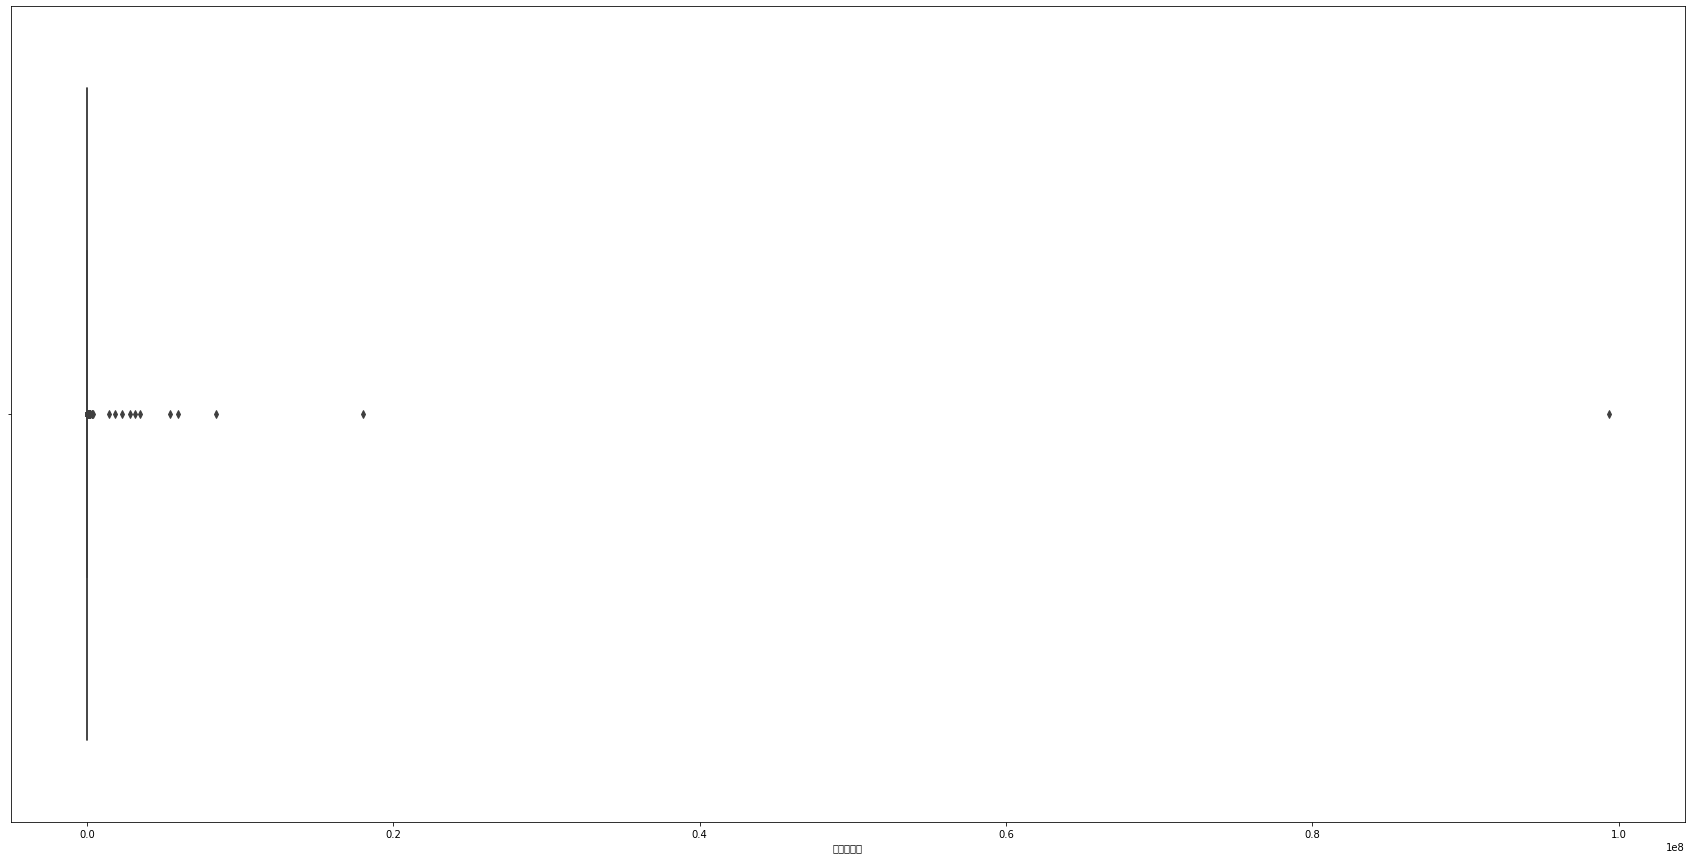

In [62]:
plt.figure(figsize=(30,15))
sns.boxplot(x = "소재지면적",  data = osv)
plt.show()

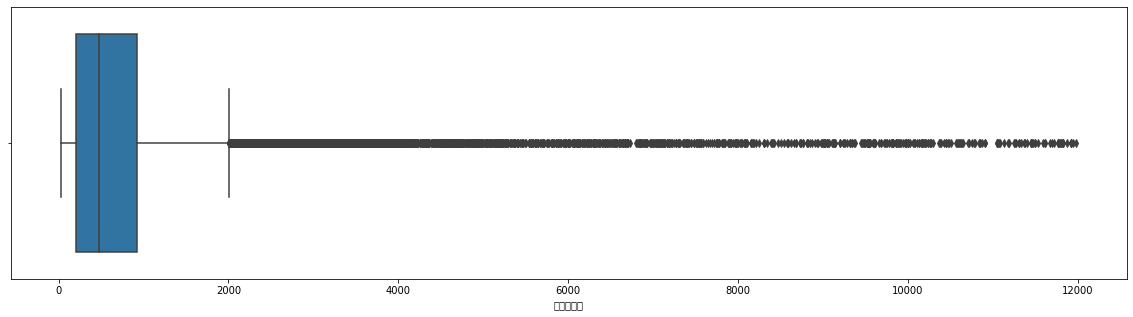

In [63]:
# 면적의 결측값 처리를 위해서 먼저 면적 이상치 처리한다.
# 상위 1%의 데이터와 하위 1%의 데이터를 제거한다.
# 99% : 3634.572평인데 max : 30049583.157평 인것으로 보아 너무 터무니 없는 면적인 사업장이 있어서 처리한다.
sas = (((fs.loc['1%'].values[0])<osv.소재지면적) & (osv.소재지면적<(fs.loc['99%'].values[0])) | (osv.소재지면적.isnull()))
mj = osv[sas]

plt.figure(figsize=(20,5))
sns.boxplot(x='소재지면적', data=mj)
plt.show()

In [64]:
# 분석과제 3의 창업을 확인할수있는 인허가일자를 새로 정의한다.
mj.loc[:,'인허가년도'] = mj.인허가일자.astype('datetime64[ns]').map(lambda x: x.year)
mj.인허가년도 = mj.인허가년도.astype('str')

In [65]:
osv['소재지면적'].fillna(method = 'bfill', inplace=True)
osv

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
0,서울특별시,종로구,3000000,2020-10-23,1,NaT,NaT,호텔 DM,127.016500,37.573348,2908.49,1,0,0,0,0,0,0
1,서울특별시,종로구,3000000,2020-10-23,1,NaT,NaT,호텔 DM,127.016500,37.573348,2908.49,0,0,1,0,0,0,0
2,서울특별시,종로구,3000000,2018-06-18,3,2020-10-08,NaT,JONGRO ALICE,126.986617,37.575468,278.43,1,0,0,0,0,0,0
3,서울특별시,종로구,3000000,2018-06-18,3,2020-10-08,NaT,JONGRO ALICE,126.986617,37.575468,278.43,0,0,1,0,0,0,0
4,서울특별시,종로구,3000000,2019-10-29,1,NaT,NaT,목시 서울 인사동 호텔,126.986453,37.572297,2067.22,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62421,충청남도,계룡시,5580000,2003-05-28,3,2017-02-22,NaT,쏘울모텔,127.253214,36.272899,1999.00,0,0,1,0,0,0,0
62422,충청남도,계룡시,5580000,2020-05-15,1,NaT,NaT,화이트모텔,127.251612,36.274451,1746.38,0,0,1,0,0,0,0
62423,충청남도,계룡시,5580000,2003-08-14,3,2020-03-14,NaT,화이트모텔,127.251612,36.274451,2040.65,0,0,1,0,0,0,0
62424,충청남도,계룡시,5580000,2003-02-27,3,2021-07-14,NaT,호텔리어,127.241293,36.288753,1905.13,0,0,1,0,0,0,0


In [66]:
ccs = osv.copy()
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 0 to 62425
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   시도명                62426 non-null  object        
 1   시군구명               62426 non-null  object        
 2   개방자치단체코드           62426 non-null  int64         
 3   인허가일자              62422 non-null  datetime64[ns]
 4   영업상태구분코드           62426 non-null  object        
 5   폐업일자               23674 non-null  datetime64[ns]
 6   휴업시작일자             343 non-null    datetime64[ns]
 7   사업장명               62426 non-null  object        
 8   경도                 62426 non-null  float64       
 9   위도                 62426 non-null  float64       
 10  소재지면적              62426 non-null  float64       
 11  개방서비스명_관광숙박업       62426 non-null  uint8         
 12  개방서비스명_관광펜션업       62426 non-null  uint8         
 13  개방서비스명_숙박업         62426 non-null  uint8         
 14  개방서비스명

In [67]:
ccs[ccs['인허가일자'].isna()]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
15481,인천광역시,중구,3490000,NaT,3,2006-01-03,NaT,광명여인숙,126.370700,37.449489,787.67,0,0,1,0,0,0,0
21562,울산광역시,동구,3710000,NaT,1,NaT,NaT,대흥장,129.425465,35.504108,348.00,0,0,1,0,0,0,0
37880,충청남도,서천군,4580000,NaT,3,2002-12-30,NaT,VIP장여관,126.696579,36.075622,731.07,0,0,1,0,0,0,0
46135,전라남도,신안군,5010000,NaT,1,NaT,NaT,남도장,125.441343,34.685040,313.62,0,0,1,0,0,0,0


In [68]:
ccs['인허가일자'].fillna({15481:'1975-02-28'}, inplace=True)
ccs.loc[[15481]]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
15481,인천광역시,중구,3490000,1975-02-28,3,2006-01-03,NaT,광명여인숙,126.3707,37.449489,787.67,0,0,1,0,0,0,0


In [69]:
ccs['인허가일자'].fillna({21562:'1984-04-31'}, inplace=True)
ccs.loc[[21562]]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
21562,울산광역시,동구,3710000,1984-04-31,1,NaT,NaT,대흥장,129.425465,35.504108,348.0,0,0,1,0,0,0,0


In [70]:
ccs['인허가일자'].fillna({37880:'1997-02-30'}, inplace=True)
ccs.loc[[37880]]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
37880,충청남도,서천군,4580000,1997-02-30,3,2002-12-30,NaT,VIP장여관,126.696579,36.075622,731.07,0,0,1,0,0,0,0


In [71]:
ccs['인허가일자'].fillna({46135:'1994-04-31'}, inplace=True)
ccs.loc[[46135]]

,시도명,시군구명,개방자치단체코드,인허가일자,영업상태구분코드,폐업일자,휴업시작일자,사업장명,경도,위도,소재지면적,개방서비스명_관광숙박업,개방서비스명_관광펜션업,개방서비스명_숙박업,개방서비스명_외국인관광도시민박업,개방서비스명_일반야영장업,개방서비스명_자동차야영장업,개방서비스명_한옥체험업
46135,전라남도,신안군,5010000,1994-04-31,1,NaT,NaT,남도장,125.441343,34.68504,313.62,0,0,1,0,0,0,0


In [72]:
ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 0 to 62425
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   시도명                62426 non-null  object        
 1   시군구명               62426 non-null  object        
 2   개방자치단체코드           62426 non-null  int64         
 3   인허가일자              62426 non-null  object        
 4   영업상태구분코드           62426 non-null  object        
 5   폐업일자               23674 non-null  datetime64[ns]
 6   휴업시작일자             343 non-null    datetime64[ns]
 7   사업장명               62426 non-null  object        
 8   경도                 62426 non-null  float64       
 9   위도                 62426 non-null  float64       
 10  소재지면적              62426 non-null  float64       
 11  개방서비스명_관광숙박업       62426 non-null  uint8         
 12  개방서비스명_관광펜션업       62426 non-null  uint8         
 13  개방서비스명_숙박업         62426 non-null  uint8         
 14  개방서비스명

In [73]:
ccs.to_excel("/content/drive/Shareddrives/쥰나쎄/권나경/찐예측데이터.xlsx", index=False)